# Data Mining and Machine Learning - Assignment questions 1 to 3

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 

**Due: Oct 23 @23.59 (Lausanne Time)**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the life expectancy.

Run the first few cells to load the dataset and then get started with the questions! **Pay attention:** in order to start working, open the notebook in Colab, and make sure to make a copy of the notebook in your private Google Drive. After you finished, export the notebook as a .ipynb file and upload it on Moodle (Section "Assignment").

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit your Python notebook
2. Answer the questions to the quiz on Moodle
>Note: You can only complete the quiz one time. Have your notebook with the answers ready for answering the quiz. The quiz will be made available Monday 10th October at 7p.m.

Only the quiz questions accounts for your grade. Nevertheless, the answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them. 

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities. In case of high similarity scores between two notebooks, both the authors will get 0 points for the assignment.

You can post your questions in slack channel #assignments.


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignment/Assignment_Q1_to_Q3_2022/Assignment_Q1_to_Q3_2022.ipynb)






In [ ]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Load the data
df = pd.read_csv("Life Expectancy Data.csv")

For this assignment, we use data gathered by the WHO (World Health Organization) regarding many countries, over several years. The dataset includes information on items purchased from this store, including for each item or article:
* **Country**
* **Year**: year of the measurement
* **Status**: Developed or Developing status
* **Life expectancy**: Life Expectancy in years
* **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **Alcohol**: Alcohol, recorded per capita (individuals aged 15+) consumption (in litres of pure alcohol)
* **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles**: Measles - number of reported cases per 1000 population
* **BMI**: Average Body Mass Index of entire population
* **under-five deaths**: Number of under-five deaths per 1000 population
* **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
* **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV/AIDS**: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* **GDP**: Gross Domestic Product per capita (in USD)
* **Population**: Population of the country
* **thinness 1-19 years**: Proportion of thinness among children and adolescents for Age 10 to 19 (in %)
* **thinness 5-9 years**: Proportion of thinness among children for Age 5 to 9 (in %)
* **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling**: Number of years of schooling

## 1. Understand and Clean the Dataset
### 1.1 Initial exploration

>1.1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [ ]:
# YOUR CODE HERE
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


>1.1.2 How many observations (rows) and columns are in the dataset?

In [ ]:
# YOUR CODE HERE
df.shape

(2938, 22)

> 1.1.3 For which variable(s), if any, are there missing/null values?

In [ ]:
# YOUR CODE HERE
a = df.isnull().sum().sort_values(ascending = False)
len([x for x in a if x > 0])




14

>1.1.4 Apply two small modifications to the names of the columns, that will help you avoid errors. 
* Remove spaces from beginning and end of the names of the features, if they have some
* Put all the feature names start with an uppercase letter or all with a lowercase letter

In [ ]:
# YOUR CODE HERE
df.rename(columns={" thinness 5-9 years": "Thinness 5-9 years", " thinness  1-19 years": "Thinness 1-19 years",  
                   ' BMI ': 'BMI',' HIV/AIDS':'HIV/AIDS','percentage expenditure':'Percentage expenditure',
                   'infant deaths':'Infant deaths','under-five deaths ':'Under-five deaths', 
                   'Diphtheria ': 'Diphtheria', 'Life expectancy ': 'Life expectancy','Measles ': 'Measles'}, inplace = True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


>1.1.5 Drop the following columns (we will not need them):
* Adult Mortality
* Alcohol
* Under-five deaths 
* Total expenditure
* Diphtheria
* Thinness  1-19 years
* Thinness 5-9 years
* Income composition of resources

In [ ]:
# YOUR CODE HERE
df.drop(['Adult Mortality', 'Alcohol', 'Under-five deaths', 'Total expenditure', 'Diphtheria',
         'Thinness 1-19 years', 'Thinness 5-9 years','Income composition of resources'], axis=1, inplace =True)

>1.1.6 Which state had the highest **life expectancy** in a single year? ONLY for this question and the following one (1.1.7), you will need to drop the rows that have NaN as life expectancy.

In [ ]:
# YOUR CODE HERE
a = df[['Life expectancy','Country','Year']].dropna()
age = a.max()[0]
a.loc[a['Life expectancy']== age]


,Life expectancy,Country,Year
241,89.0,Belgium,2014
915,89.0,Finland,2014
937,89.0,France,2008
938,89.0,France,2007
995,89.0,Germany,2014
1293,89.0,Italy,2004
1850,89.0,New Zealand,2010
1916,89.0,Norway,2009
2056,89.0,Portugal,2014
2433,89.0,Spain,2007


>1.1.7 Which state had the highest **life expectancy** on average over all the years covered by the dataset?

In [ ]:
# YOUR CODE HEREas_index=False
b = df.groupby('Country', as_index=False).mean()
max_average_Le = b['Life expectancy'].max()
b[['Country', 'Life expectancy']].loc[b['Life expectancy'] == max_average_Le]

,Country,Life expectancy
84,Japan,82.5375


>1.1.8 What percentage of developing countries have GDP per capita (averaged over the period) higher than 1000? Drop countries with missing GDP for this question. Round up to 3 decimal points. ONLY for this question, you will need to drop the rows that have NaN as GDP.


In [ ]:
# YOUR CODE HERE
b = df.loc[df['Status'] == 'Developing']
b = b.groupby('Country', as_index=False).mean()
b = b.dropna(subset = ['GDP'])
b.isnull().sum()
c = b[b['GDP'] > 1000]
print(c.shape[0])
print(b.shape[0])
a = (c.shape[0]/  b.shape[0])*100
round(a,3)

88
135


65.185

### 1.2 Data types

>1.2.1. List the different features and their data type. ¶


In [ ]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life expectancy         2928 non-null   float64
 4   Infant deaths           2938 non-null   int64  
 5   Percentage expenditure  2938 non-null   float64
 6   Hepatitis B             2385 non-null   float64
 7   Measles                 2938 non-null   int64  
 8   BMI                     2904 non-null   float64
 9   Polio                   2919 non-null   float64
 10  HIV/AIDS                2938 non-null   float64
 11  GDP                     2490 non-null   float64
 12  Population              2286 non-null   float64
 13  Schooling               2775 non-null   float64
dtypes: float64(9), int64(3), object(2)
memor

>1.2.2. Are there any duplicated entries?

In [ ]:
# YOUR CODE HERE
df.duplicated().sum()

0

>1.2.3. Change the data type for the following columns: Country (from object to string), Status (from object to category)


In [ ]:
# YOUR CODE HERE
df["Country"] = df["Country"].astype("string")
df["Status"] = df["Status"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 2938 non-null   string  
 1   Year                    2938 non-null   int64   
 2   Status                  2938 non-null   category
 3   Life expectancy         2928 non-null   float64 
 4   Infant deaths           2938 non-null   int64   
 5   Percentage expenditure  2938 non-null   float64 
 6   Hepatitis B             2385 non-null   float64 
 7   Measles                 2938 non-null   int64   
 8   BMI                     2904 non-null   float64 
 9   Polio                   2919 non-null   float64 
 10  HIV/AIDS                2938 non-null   float64 
 11  GDP                     2490 non-null   float64 
 12  Population              2286 non-null   float64 
 13  Schooling               2775 non-null   float64 
dtypes: category(1), float64(

>1.2.4. For which period have these data samples been collected? (i.e, the oldest and the most recent entries in the dataset)

In [ ]:
# YOUR CODE HERE
print(df['Year'].min())
print(df['Year'].max())


2000
2015



## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 countries that had the highest **population growth** over the period included in the dataset?
Consider population growth as the difference between the population in the last year and the first year of measurement

>Hint: for each country, the data follows a certain order...

In [ ]:
# YOUR CODE HERE
now = df.loc[df['Year'] == 2015]
past = df.loc[df['Year'] == 2000]
past_population1 = past[['Population','Country']]
now_population1 = now[['Population','Country']]
past_population = past_population1
past_population = pd.DataFrame(past_population).reset_index()
past_population #= past_population['Population']
now_population = now_population1
now_population = pd.DataFrame(now_population).reset_index()
growth = (now_population['Population'] - past_population['Population']) #= now_population['Population']
a = growth.sort_values(ascending = False).index
top_index = a[0:5]
for i in top_index:
  print(past_population['Country'].iloc[i])


Indonesia
Nigeria
Germany
Turkey
Colombia


>2.2 How many unique countries were included in the dataset?

In [ ]:
# YOUR CODE HERE
df['Country'].unique().size

193

>...Plot the top ten countries by average GDP on a horizontal bar chart.

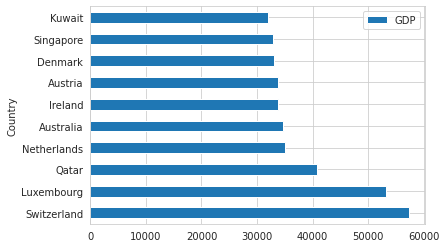

In [ ]:
# YOUR CODE HERE
df_GDP = df.groupby('Country', as_index = False).mean()
df_GDP = df_GDP.sort_values(by=['GDP'], ascending = False).head(10)
df_GDP.plot.barh(x = 'Country', y= 'GDP')

>2.3. Sometimes it is useful to group datapoints that share certain common traits. That's what we'll do in this composite question. All the modifications to the dataframe suggested here must be ONLY for the questions 2.3. So we suggest to generate a new dataframe for this question, to avoid affecting the main one.

> 2.3.1 First, aggregate the data by country taking the mean of every numerical feature. At this point you should have 1 row per Country. Keep only the following features: `HIV/AIDS`,`Polio`,`Measles`,`Infant deaths`,`Hepatitis B`. (Remember, you might need the other features after question 2.3, so do not delete them from the main df)

In [ ]:
# YOUR CODE HERE
new_df = df.groupby('Country', as_index = False).mean()
new_df = new_df[['Country','HIV/AIDS','Polio','Measles','Infant deaths','Hepatitis B']]
new_df

,Country,HIV/AIDS,Polio,Measles,Infant deaths,Hepatitis B
0,Afghanistan,0.10000,48.3750,2362.2500,78.2500,64.562500
1,Albania,0.10000,98.1250,53.3750,0.6875,98.000000
2,Algeria,0.10000,91.7500,1943.8750,20.3125,78.000000
3,Angola,2.36875,46.1250,3561.3125,83.7500,70.222222
4,Antigua and Barbuda,0.12500,96.9375,0.0000,0.0000,98.266667
...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),0.10000,74.6875,165.0000,9.3750,66.250000
189,Viet Nam,0.14375,94.9375,4232.9375,29.1875,87.538462
190,Yemen,0.10000,67.1250,2761.1875,39.3750,55.687500
191,Zambia,11.93125,64.3750,6563.8125,33.4375,69.818182


> 2.3.2 Then, keep only the following columns, and AFTERWARDS drop all the rows that have NaN values : `HIV/AIDS`,`Polio`,`Measles`,`Infant deaths`,`Hepatitis B`. (Remember, you might need them after question 2.3, so do not delete them from the main df)

In [ ]:
# YOUR CODE HERE
new_df = new_df.dropna()
new_df = new_df.reset_index(drop = True)

In [ ]:
new_df

,Country,HIV/AIDS,Polio,Measles,Infant deaths,Hepatitis B
0,Afghanistan,0.10000,48.3750,2362.2500,78.2500,64.562500
1,Albania,0.10000,98.1250,53.3750,0.6875,98.000000
2,Algeria,0.10000,91.7500,1943.8750,20.3125,78.000000
3,Angola,2.36875,46.1250,3561.3125,83.7500,70.222222
4,Antigua and Barbuda,0.12500,96.9375,0.0000,0.0000,98.266667
...,...,...,...,...,...,...
179,Venezuela (Bolivarian Republic of),0.10000,74.6875,165.0000,9.3750,66.250000
180,Viet Nam,0.14375,94.9375,4232.9375,29.1875,87.538462
181,Yemen,0.10000,67.1250,2761.1875,39.3750,55.687500
182,Zambia,11.93125,64.3750,6563.8125,33.4375,69.818182


> 2.3.3 Then, build a new column in the dataset with a new composite index, the NHI (New Health Index). It integrates the situation of the country with regards to the HIV/AIDS, Polio, Measles, Infant deaths, Hepatitis B. The higher, the worse the situation. It needs to follow the following formula: $$BHI = 10*HIV + 2*Polio + \sqrt{Measles} + (Infant deaths)^{2} + Hepatitis B$$

In [ ]:
# YOUR CODE HERE
NHI = 10 * new_df['HIV/AIDS'] + 2 * new_df['Polio'] + pow(new_df['Measles'],0.5) + pow(new_df['Infant deaths'],2) + new_df['Hepatitis B']
NHI = pd.DataFrame (NHI, columns = ['NHI'])
NHI.dropna()

,NHI
0,6333.977983
1,303.028476
2,719.187054
3,7259.898956
4,293.391667
...,...
179,317.360858
180,1195.822147
181,1793.875128
182,1516.964447


In [ ]:
new_df = pd.concat([new_df, NHI], axis = 1)
new_df.iloc[100]

Country          Marshall Islands
HIV/AIDS                      0.1
Polio                        79.0
Measles                       0.0
Infant deaths                 0.0
Hepatitis B                   8.0
NHI                         167.0
Name: 100, dtype: object

> 2.3.4 After you added the column with the index, create another column, categorical, called "Health risk", which can have 4 different values:
* Very high risk
* High risk
* Medium risk
* Low risk
> You should assign the value to each row depening on the quartile the datapoint belongs to, following the NHI. If it is in the lowest 25%, it needs to be low risk, if it's between 25 and 50%, it will be Medium, between 50 and 75% High risk, between 75% and 100% Very high risk.
Hint: you may want to check the `qcut` function of Pandas.

> Finally, count the values of each class you created. How many datapoints are "High Risk"?

In [ ]:
# YOUR CODE HERE 
Health_risk = pd.qcut(new_df['NHI'], 4, labels=["Low risk", "Medium risk", "High risk", 'Very high risk'])


In [ ]:
Health_risk= pd.DataFrame(Health_risk)
Health_risk = Health_risk.rename({'NHI':'Health risk'}, axis='columns')
new_df = pd.concat([new_df, Health_risk], axis = 1)
print(new_df.loc[new_df['Health risk']== 'High risk'].shape)
print(new_df.loc[new_df['Health risk']== 'Medium risk'].shape)

(46, 8)
(46, 8)


>2.4 Compare GDP in 2002 and in 2012. Were there any countries that had a lower GDP with respect to 2002? If so, how many?

In [ ]:
# YOUR CODE HERE
a = df.loc[df['Year'] == 2002]
b = df.loc[df['Year'] == 2012]
difference = a['GDP'] - b['GDP']
a = a.reset_index(drop = True)
b = b.reset_index(drop = True)
difference = pd.DataFrame(b['GDP'] - a['GDP'])
difference.dropna()
negatives  = difference[difference['GDP'] <0].value_counts().sum()
negatives

24

>2.5 Generate a table with the average life expectancy by year for three different groups: 
>* for all developing countries
>* developed countries
>* the overall aggregated values.

>Then, plot the three trends in a line plot with the aggregated values for Life expectancy on y axis and the years on the x axis.


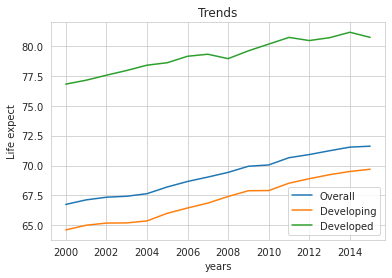

In [ ]:
# YOUR CODE HERE
# Generate the table
a = df.groupby(['Year', 'Status'], as_index = False).mean()
Developed = a.loc[a['Status']== 'Developed']
Developed = pd.DataFrame(Developed['Life expectancy'])
Developed = Developed.rename({'Life expectancy': 'Developed'}, axis = 'columns')
Developing = a.loc[a['Status']== 'Developing']
Developing = pd.DataFrame(Developing['Life expectancy'])
Developing = Developing.rename({'Life expectancy': 'Developing'}, axis = 'columns')
Overall = df.groupby('Year', as_index = False).mean()
Overall = pd.DataFrame(Overall[['Life expectancy','Year']])
Overall = Overall.rename({'Life expectancy': 'Overall'}, axis = 'columns')
Developing = Developing.reset_index(drop = True)
Developed = Developed.reset_index(drop = True)
Overall = Overall.reset_index(drop = True)
df1 = pd.concat([Overall, Developing, Developed], axis = 1)
df1 = df1.set_index(keys='Year')
a = df1.plot.line(ylabel= 'Life expect', xlabel= 'years', title= 'Trends')
# Plot

>2.6 Draw boxplots to compare the BMI (body mass index) between developed and developing countries. Before doing so, aggregate by country and average over time the BMI for each country. Remember to remove Nans. Do developed or developing have a higher median? Which has more outliers?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


([<matplotlib.axis.XTick at 0x7ff97eacd310>,
 [Text(0, 0, 'Developing'), Text(0, 0, 'Developed')])

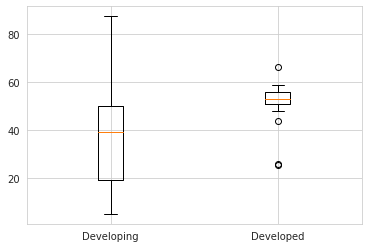

In [ ]:
# YOUR CODE HERE
df_bmi = df.groupby(['Country', 'Status'], as_index = False).mean()
df_bmi = df_bmi.dropna(subset = ['BMI'])
Developed = df_bmi.loc[df_bmi['Status']== 'Developed']
Developing = df_bmi.loc[df_bmi['Status']== 'Developing']
Developed = pd.DataFrame(Developed[['Country','BMI']])
Developing = pd.DataFrame(Developing[['Country','BMI']])
Developing = Developing.reset_index(drop= True)
Developed = Developed.reset_index(drop = True)
plt.boxplot([Developing['BMI'], Developed['BMI']])
plt.xticks([1, 2], ['Developing', 'Developed'])

>2.7 Using `folium`, plot on an interactive map the life expectancy of the countries represented in the dataset. You need to have a scale of colors, the more intense the color, the higher the life expectancy of the country.
>
> Only include 2015 data.
>
>A separate geojson file with latitudes and longitudes of the countries needs to be downloaded from [here](https://datahub.io/core/geo-countries). You should use the `folium.Choropleth` method and give the geojson file as `geo_data` parameter. The `key_on` parameter should be set to `"feature.properties.ADMIN"` because of the structure of the json file. Make sure to drop any missing values before plotting your map.






In [ ]:
import folium
geo = "countries.geojson"
m =folium.Map()
my_map1 = folium.Choropleth(geo_data = r'/content/countries.geojson.assignment', data = df, columns = ['Country','Life expectancy'], key_on ='feature.properties.ADMIN', fill_color = 'YlOrRd').add_to(m)
m


# YOUR CODE HERE

Output hidden; open in https://colab.research.google.com to view.

## Before regression: One Hot Encoding

Before moving on to the regression, we need to transform the categorical variables as dummy variables for the regression. In order to do so, we use a [One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Pay attention: we need to consider "year" as a categorical variable as well, as it is not a continuous one. So the two features that you need to encode are: Year and Status. Add the features to the dataset. 
Reminder: when encoding n categories, we need to add n-1 features to avoid multicollinearity - the "Dummy variable trap".

>2.8 How many features does the dataframe have now, after adding n-1 columns for year and m-1 for status, where n and m are respectively the number of categories possible?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# YOUR CODE HERE
x = df['Year']
encoder = OneHotEncoder(handle_unknown='ignore', drop= 'first')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Year','Status']]).toarray())
final_df = df.join(encoder_df)
final_df  =  final_df.rename({0:'2001',1:'2002', 2:'2003', 3:'2004', 4:'2005', 5:'2006', 6:'2007',
                              7:'2008', 8:'2009', 9:'2010', 10:'2011', 11:'2012', 12:'2013', 13: '2014',14 :'2015',
                              15:'Status'}, axis = 'columns')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 2938 non-null   string  
 1   Year                    2938 non-null   int64   
 2   Status                  2938 non-null   category
 3   Life expectancy         2928 non-null   float64 
 4   Infant deaths           2938 non-null   int64   
 5   Percentage expenditure  2938 non-null   float64 
 6   Hepatitis B             2385 non-null   float64 
 7   Measles                 2938 non-null   int64   
 8   BMI                     2904 non-null   float64 
 9   Polio                   2919 non-null   float64 
 10  HIV/AIDS                2938 non-null   float64 
 11  GDP                     2490 non-null   float64 
 12  Population              2286 non-null   float64 
 13  Schooling               2775 non-null   float64 
 14  2001                    

## 3. Regression Analysis
### 3.1 Intro to regression

For this section we will try to build a model to predict the life expectancy, given other data regarding a country. Here we are providing the cleaned dataframe for you. The regression dataset is the same you've been working on until now with some additional cleaning. The features available are the following:
* Alcohol
* Schooling
* GDP
* Life expectancy
* Percentage expenditure
* One dummy feature for each year except for 1 (2000,2001,2002,...)
* One dummy feature "Developing" indicating whether the country is a developing one or not

>Load the data.

In [ ]:
#Upload the data
new_data = pd.read_csv("Regression Analysis Data")
new_data

,Country,Year,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Developing
0,Afghanistan,2015,65.0,0.01,71.279624,584.259210,33736494.0,10.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Afghanistan,2014,59.9,0.01,73.523582,612.696514,327582.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Afghanistan,2013,59.9,0.01,73.219243,631.744976,31731688.0,9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Afghanistan,2012,59.5,0.01,78.184215,669.959000,3696958.0,9.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Afghanistan,2011,59.2,0.01,7.097109,63.537231,2978599.0,9.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2004,44.3,4.36,0.000000,454.366654,12777511.0,9.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2113,Zimbabwe,2003,44.5,4.06,0.000000,453.351155,12633897.0,9.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2114,Zimbabwe,2002,44.8,4.43,0.000000,57.348340,125525.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2115,Zimbabwe,2001,45.3,1.72,0.000000,548.587312,12366165.0,9.8,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


>3.1.1. Generate descriptive statistics

In [ ]:
# YOUR CODE HERE
new_data.describe(include='all')

,Country,Year,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Developing
count,2117,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2.117000e+03,2117.000000,2117.000000,2117.000000,...,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000
unique,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.004251,68.629003,4.712300,897.159420,6678.433958,1.296805e+07,11.883562,0.066131,0.066604,...,0.067076,0.067076,0.066604,0.066604,0.066604,0.066604,0.066131,0.066131,0.066131,0.815305
std,NaN,4.321822,9.874433,4.048895,2236.390076,13754.819775,6.294690e+07,3.353225,0.248570,0.249393,...,0.250213,0.250213,0.249393,0.249393,0.249393,0.249393,0.248570,0.248570,0.248570,0.388142
min,NaN,2000.000000,36.300000,0.010000,0.000000,1.681350,3.400000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2003.000000,62.100000,0.970000,31.594159,418.292176,1.923120e+05,9.900000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,2007.000000,71.400000,4.080000,126.698109,1461.671957,1.354775e+06,12.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,2011.000000,75.400000,7.560000,549.809610,4981.198619,7.295394e+06,14.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


>3.1.2. Plot the distribution of life expectancy in 2000 and in 2012. Then create a new column equal to the natural logarithm of life expectancy and plot its histogram as well, just for year 2000.

AxesSubplot(0.125,0.125;0.775x0.755)


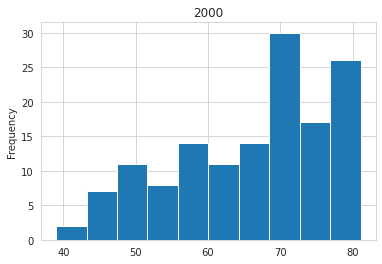

In [ ]:
# YOUR CODE HERE
#Generate the first 2 histograms: 2000 and 2012
Life_00 = new_data.loc[new_data['Year']== 2000]
Life_00
print(Life_00['Life expectancy'].plot.hist(title = '2000'))




AxesSubplot(0.125,0.125;0.775x0.755)


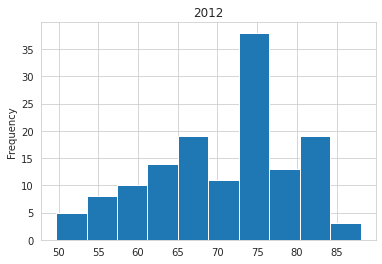

In [ ]:
Life_12 = new_data.loc[new_data['Year']== 2012]
print(Life_12['Life expectancy'].plot.hist(title = '2012'))

AxesSubplot(0.125,0.125;0.775x0.755)


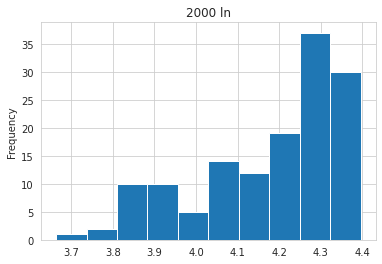

In [ ]:
# YOUR CODE HERE
#Add the new column with the log
new_data['log_life'] = np.log(new_data['Life expectancy'])
new_data 
Life_000 = new_data.loc[new_data['Year']== 2000]
print(Life_000['log_life'].plot.hist(title = '2000 ln'))
#Generate the second histogram: 2000, but with the log



>3.1.3. Create 3 pairplots with the log of life expectancy on the horizontal axis and on the vertical axis GDP, population, schooling. Which seems to be the best predictor?


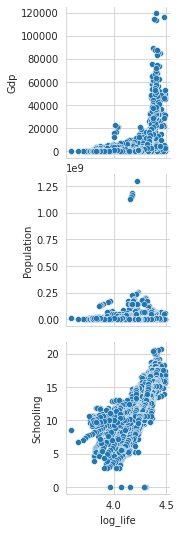

In [ ]:
# YOUR CODE HERE

sns.pairplot(new_data, y_vars= ['Gdp', 'Population', 'Schooling'], x_vars = ['log_life'])

## 3.2 Simple Linear Regression

>3.2.1 Drop the feature "Year", since we have hot-encoded it. Regress, using the library `sklearn`, log of life expectancy on Alcohol, gdp, population, percentage expenditure, schooling, Developing, and all the dummy variables for the years.
> 
>Select the dependent (y) and the independent variables (X).

In [ ]:
# YOUR CODE HERE
new_data = new_data.drop(columns = ['Year'])
new_data
#
#y = np.array(ad_df["Sales"])

,Country,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,Developing,log_life
0,Afghanistan,65.0,0.01,71.279624,584.259210,33736494.0,10.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.174387
1,Afghanistan,59.9,0.01,73.523582,612.696514,327582.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.092677
2,Afghanistan,59.9,0.01,73.219243,631.744976,31731688.0,9.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.092677
3,Afghanistan,59.5,0.01,78.184215,669.959000,3696958.0,9.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.085976
4,Afghanistan,59.2,0.01,7.097109,63.537231,2978599.0,9.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.080922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,44.3,4.36,0.000000,454.366654,12777511.0,9.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.790985
2113,Zimbabwe,44.5,4.06,0.000000,453.351155,12633897.0,9.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.795489
2114,Zimbabwe,44.8,4.43,0.000000,57.348340,125525.0,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.802208
2115,Zimbabwe,45.3,1.72,0.000000,548.587312,12366165.0,9.8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.813307


In [ ]:
from sklearn.linear_model import LinearRegression
X = np.array(new_data[["Alcohol",'Percentage expenditure','Gdp','Population','Schooling','2000', '2001', '2002', '2003', '2004', '2005','2006', '2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014','Developing']])
y = np.array(new_data["log_life"])
LR = LinearRegression()
LR.fit(X, y)


LinearRegression()

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 42.**

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2)

>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
model= LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
r_carré = r2_score(y_test, prediction)
#r_carré = model.score(X_train, y_train)
round(r_carré,4)

0.5696

>3.2.4. Predict what would be the life expectancy of a (very small) country with an Alcohol consumption of 5 liters, GDP per capita of 800 dollars, a population of 300 individuals, 62 as percentage expenditure, 8 as schooling in year 2000. It is not a developing country.

In [ ]:
# YOUR CODE HERE
#a = ('Alcohol: ', 5, "Gdp: ", 800, "Population: ", 300, "Percentage expenditure: ", 62, 'Schooling: ', 8, '2000: ', 1, '2001: ', 0,'2002: ', 0, '2003: ', 0, '2004: ', 0, '2005: ', 0, '2006: ', 0, '2007: ', 0, '2008: ', 0, '2009: ', 0, '2010: ', 0, '2011: ', 0, '2012: ', 0, '2013: ', 0, '2014: ', 0, 'Developing: ',0, 'log_life: ', model.predict(np.array([5, 800, 300, 62, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#print(np.exp(a))
test = ([[5,62,800,300,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
a = model.predict([[5,62,800,300,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
np.exp(a)

array([62.49550245])

## 3.3 Linear Regression with Standardization

> 3.3.1. Apply a standard scaler to the following columns: Alcohol, gdp, population, percentage expenditure, schooling
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

> 3.3.2 Train a linear regression model with the standardised data. What is the R^2 score for the test data?

In [ ]:
# YOUR CODE HERE
from sklearn.compose import ColumnTransformer
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model= LinearRegression()
model.fit(X_train, y_train)
#X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2)
#num_colums = ["Alcohol",'Percentage expenditure','Gdp','Population','Schooling']
#scaler = StandardScaler()
#preprocessor = ColumnTransformer([('Standardization', scaler, num_colums)], remainder = 'passthrough')
#encodedX_test = preprocessor.fit(X_test)
#encodedX_test = pd.DataFrame(encodedX_test, columns = X_test.columns)
#encodedX_test.head(1)
#print(encodedX_train.head(1))
prediction = model.predict(X_test)
r_carré = r2_score(y_test, prediction)
round(r_carré,4)
#pd.Dataframe
#df = pd.DataFrame(data=d)
##{'Alcohol': [5], 'Gdp': [800], 'Population':[300], 'Percentage expenditure':[62], 'Schooling':[8]}

0.5696

In [ ]:
#a = (5-new_data['Alcohol'].mean())/new_data['Alcohol'].std()
#b = (800-new_data['Gdp'].mean())/new_data['Gdp'].std()
#c = (300-new_data['Population'].mean())/new_data['Population'].std()
#d = (62-new_data['Percentage expenditure'].mean())/new_data['Percentage expenditure'].std()
#e = (8-new_data['Schooling'].mean())/new_data['Schooling'].std()


> 3.3.3 With the new model, predict, as before, what would be the life expectancy of a (very small) country with an Alcohol consumption of 5 liters, GDP per capita of 800 dollars, a population of 300 individuals, 62 as percentage expenditure, 8 as schooling in year 2000. It is not a developing country.

In [ ]:
# YOUR CODE HERE
a = ([[5,62,800,300,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
b = scaler.transform(a[0:6])
#l= ('Alcohol: ', a, "Gdp: ", b, "Population: ", c, "Percentage expenditure: ",d , 'Schooling: ', e, '2000: ', 1,'2001: ', 0,'2002: ', 0, '2003: ', 0, '2004: ', 0, '2005: ', 0, '2006: ', 0, '2007: ', 0, '2008: ', 0, '2009: ', 0, '2010: ', 0, '2011: ', 0, '2012: ', 0, '2013: ', 0, '2014: ', 0, 'Developing: ',0, 'log_life: ', model.predict(np.array([a,b,c,d,e, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(-1,21)))
c = model.predict(b)
np.exp(c)

array([62.49550245])

>3.3.4 Looking at the coefficients from the linear regression with standardization, identify which variable is the one with the strongest impact on the dependent variable.

In [ ]:
# YOUR CODE HERE
##print("params: ", model.coef_[0])
#pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logreg.coef_[0]})
#print(model.coef_)
#a = np.where(model.coef_ == model.coef_)
coeffs = pd.Series(model.coef_, index=[["Alcohol",'Gdp','Population','Percentage expenditure','Schooling','2000', '2001', '2002', '2003', '2004', '2005','2006', '2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014','Developing']])
coeffs.sort_values(ascending = False)

Schooling                 0.111440
Population                0.014088
Percentage expenditure    0.002697
Gdp                      -0.001593
2000                     -0.005497
2009                     -0.006070
2002                     -0.006591
2010                     -0.007518
2001                     -0.007681
2011                     -0.007926
2007                     -0.008147
2012                     -0.008422
2006                     -0.008763
2013                     -0.008856
2008                     -0.008887
2005                     -0.010819
2014                     -0.011119
2003                     -0.011652
2004                     -0.013631
Developing               -0.019137
Alcohol                  -0.024822
dtype: float64

> 3.3.5 Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: `GDP`, `Population` and all the year features and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).
>
> Remember to use 42 as the **random_state**

In [ ]:
# YOUR CODE HERE
import statsmodels.api as sm

1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5471540609578555

>3.3.6 Train the model when you drop `GDP` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE
X = np.array(new_data[["Alcohol",'Population','Percentage expenditure','Schooling','Developing','2000', '2001', '2002', '2003', '2004', '2005','2006', '2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014']])
y = np.array(new_data["log_life"])
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model= LinearRegression() #PERHAPS CHANGE AND ONLY SCALE THE INTERESTING FEATURES
model.fit(X_train, y_train)
1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5473328713944843

> 3.3.7 Train the model when you drop `Population` and calculate the adjusted R-squared. Pay attention: you only need to drop `Population`, you need `GDP` back in there.

In [ ]:
# YOUR CODE HERE
X = np.array(new_data[["Alcohol",'Gdp','Percentage expenditure','Schooling','Developing','2000', '2001', '2002', '2003', '2004', '2005','2006', '2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014']])
y = np.array(new_data["log_life"])
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2, shuffle = True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model= LinearRegression()
model.fit(X_train, y_train)
1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5484336114449948

>3.3.8 Train the model when you drop all the year features and calculate the adjusted R-squared. Pay attention: you only need to drop all the year features, you need `GDP` and `Population` back in there. 

In [ ]:
# YOUR CODE HEREX = np.array(new_data[["Alcohol",'Population','Percentage expenditure','Schooling','Developing','2000', '2001', '2002', '2003', '2004', '2005','2006', '2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014']])
X = np.array(new_data[["Alcohol",'Gdp','Population','Percentage expenditure','Schooling','Developing']])
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2, shuffle = True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model= LinearRegression()
model.fit(X_train, y_train)
a = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
round(a,4)

0.5751